In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sns


#Generating the Synthetic Dataset

In [ ]:
# Generate synthetic dataset with 1000 samples, 20 features, and 5 distinct classes
X, y = make_classification(n_samples=1000, n_features=20, n_classes=5, n_informative=15, n_clusters_per_class=1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the labels to one-hot encoding for multi-class classification
def one_hot_encode(labels, num_classes):
    one_hot = np.zeros((labels.size, num_classes))
    one_hot[np.arange(labels.size), labels] = 1
    return one_hot

y_train_one_hot = one_hot_encode(y_train, 5)
y_test_one_hot = one_hot_encode(y_test, 5)

# Neural Network Class Implementation

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.weights = [
            np.random.randn(input_size, hidden_sizes[0]),
            np.random.randn(hidden_sizes[0], hidden_sizes[1]),
            np.random.randn(hidden_sizes[1], hidden_sizes[2]),
            np.random.randn(hidden_sizes[2], output_size)
        ]
        self.biases = [
            np.random.randn(hidden_sizes[0]),
            np.random.randn(hidden_sizes[1]),
            np.random.randn(hidden_sizes[2]),
            np.random.randn(output_size)
        ]

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_pred, y_true):
        n_samples = y_true.shape[0]
        logp = - np.log(y_pred[np.arange(n_samples), y_true.argmax(axis=1)])
        loss = np.sum(logp) / n_samples
        return loss

    def feedForward(self, X):
        """Forward pass through the network"""
        self.z1 = np.dot(X, self.weights[0]) + self.biases[0]
        self.a1 = self.relu(self.z1)

        self.z2 = np.dot(self.a1, self.weights[1]) + self.biases[1]
        self.a2 = self.relu(self.z2)

        self.z3 = np.dot(self.a2, self.weights[2]) + self.biases[2]
        self.a3 = self.relu(self.z3)

        self.z4 = np.dot(self.a3, self.weights[3]) + self.biases[3]
        y_pred = self.softmax(self.z4)
        return y_pred

    def backPropagation(self, X, y_true, y_pred, learning_rate=0.01):
        """Backward pass and weight updates using backpropagation"""
        m = y_true.shape[0]

        dz4 = y_pred - y_true
        dw4 = np.dot(self.a3.T, dz4) / m
        db4 = np.sum(dz4, axis=0) / m

        dz3 = np.dot(dz4, self.weights[3].T) * self.relu_derivative(self.z3)
        dw3 = np.dot(self.a2.T, dz3) / m
        db3 = np.sum(dz3, axis=0) / m

        dz2 = np.dot(dz3, self.weights[2].T) * self.relu_derivative(self.z2)
        dw2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0) / m

        dz1 = np.dot(dz2, self.weights[1].T) * self.relu_derivative(self.z1)
        dw1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0) / m

        self.weights[3] -= learning_rate * dw4
        self.biases[3] -= learning_rate * db4

        self.weights[2] -= learning_rate * dw3
        self.biases[2] -= learning_rate * db3

        self.weights[1] -= learning_rate * dw2
        self.biases[1] -= learning_rate * db2

        self.weights[0] -= learning_rate * dw1
        self.biases[0] -= learning_rate * db1

    def train(self, X_train, y_train, epochs=1000, learning_rate=0.01):
        loss_history = []
        for epoch in range(epochs):
            y_pred = self.feedForward(X_train)
            loss = self.cross_entropy_loss(y_pred, y_train)
            loss_history.append(loss)
            self.backPropagation(X_train, y_train, y_pred, learning_rate)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

        # Plot the loss over epochs
        plt.plot(loss_history)
        plt.title('Loss over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()

    def predict_proba(self, X):
        """Predict probabilities (Softmax output)"""
        return self.feedForward(X)

    def predict(self, X):
        """Predict class labels"""
        y_pred = self.feedForward(X)
        return np.argmax(y_pred, axis=1)


#Training and Evaluation


<ipython-input-3-8011ffac2290>:28: RuntimeWarning: divide by zero encountered in log
  logp = - np.log(y_pred[np.arange(n_samples), y_true.argmax(axis=1)])


Epoch 0, Loss: inf
Epoch 100, Loss: 1.4609666863916666
Epoch 200, Loss: 1.3682226261357249
Epoch 300, Loss: 1.3355208046905644
Epoch 400, Loss: 1.3120753504016944
Epoch 500, Loss: 1.2985588727583768
Epoch 600, Loss: 1.2869579798480837
Epoch 700, Loss: 1.2802741004359564
Epoch 800, Loss: 1.2749333173070843
Epoch 900, Loss: 1.2711249769966997


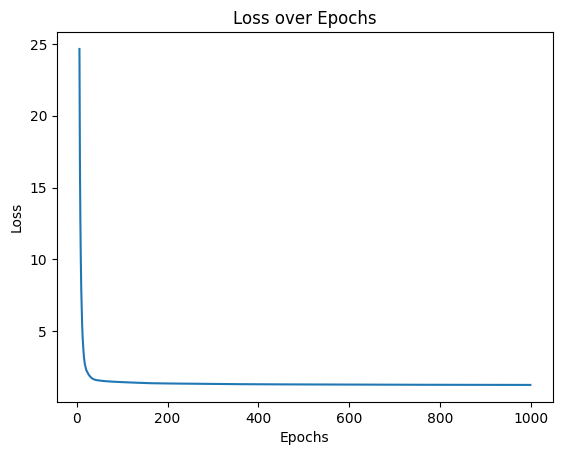

Accuracy: 28.00%


In [ ]:
# Initialize the neural network
nn = NeuralNetwork(input_size=20, hidden_sizes=[128, 64, 32], output_size=5)

# Train the neural network
nn.train(X_train, y_train_one_hot, epochs=1000, learning_rate=0.01)

# Make predictions on the test set
y_pred = nn.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


In [ ]:
# Generate classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.55      0.13      0.21        45
           1       0.64      0.18      0.29        38
           2       0.42      0.13      0.20        39
           3       0.00      0.00      0.00        34
           4       0.24      0.86      0.37        44

    accuracy                           0.28       200
   macro avg       0.37      0.26      0.21       200
weighted avg       0.38      0.28      0.22       200



#Performance Metrics(confusion matrix)



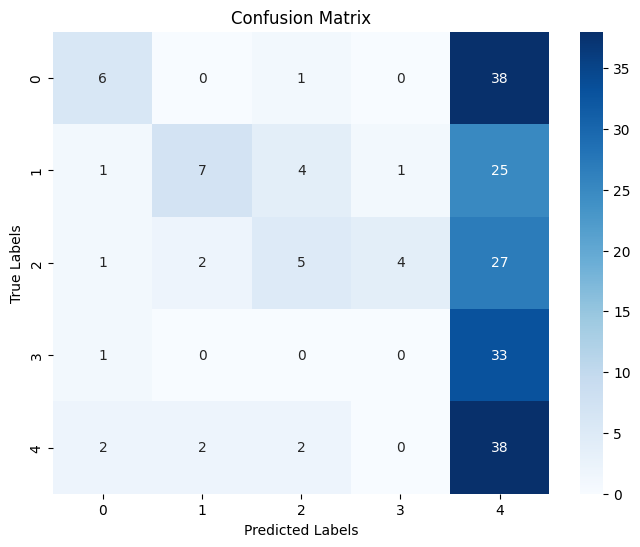

In [ ]:
# After training and making predictions
y_pred = nn.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
